### OpenCV로 정지영상과 동영상의 읽기 쓰기에 대한 기본연습

본 예제는 https://github.com/chulminkw/DLCV 에서 코드를 다운받아 수정된 코드임.

#### PIL 패키지를 이용한 이용한 영상읽기 쓰기

In [2]:
from google.colab import files
uploaded = files.upload()

Saving image2.jpg to image2.jpg


image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


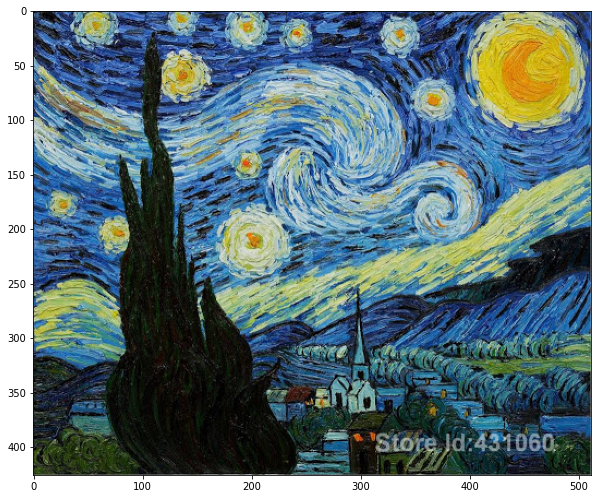

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np

# PIL은 oepn()으로 image file을 읽어서 ImageFile객체로 생성. 
pil_image = Image.open("image2.jpg")
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
#plt.show()

In [4]:
# ImageFile객체내의 영상값을 numpy 배열로 변환
pil_image_np = np.array(pil_image)

In [5]:
# 0번 channel(Red channel)을 출력해보기
# RGB shape를 가지고 있음
print(pil_image_np.shape)
print(pil_image_np[:,:,0])

(426, 512, 3)
[[160  73  77 ...  64  90  99]
 [114   8  44 ...  28  60  67]
 [ 80   0  29 ...  50  58  77]
 ...
 [ 75  43  44 ...   4  16  80]
 [ 78  38  30 ...  14  12  60]
 [103  75  74 ...  74  87 108]]


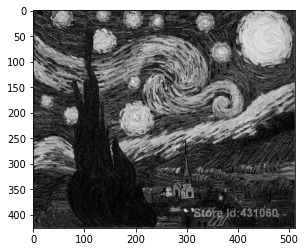

In [6]:
plt.imshow(pil_image_np[:,:,0],cmap='gray')    # red 채널을 gray로 뿌려준다. 

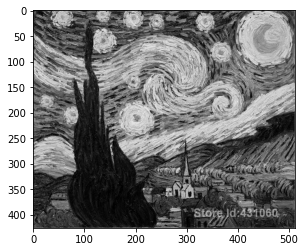

In [7]:
plt.imshow(pil_image_np[:,:,1],cmap='gray')    # green 채널을 gray로 뿌려준다. 

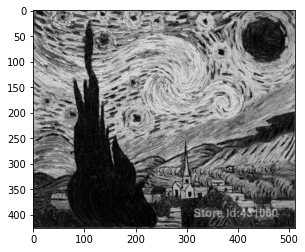

In [8]:
plt.imshow(pil_image_np[:,:,2],cmap='gray')    # blue 채널을 gray로 뿌려준다. 

#### OpenCV로 영상읽기
* OpenCV의 imread()를 읽으면 원본 RGB 이미지가 BGR 형태로 넘파이 배열로 반환함.  
* OpenCV의 imwrite()를 이용하여 BGR 형태의 영상 배열을 파일에 기록하면 때 다시 RGB형태로 변환하여 저장함.

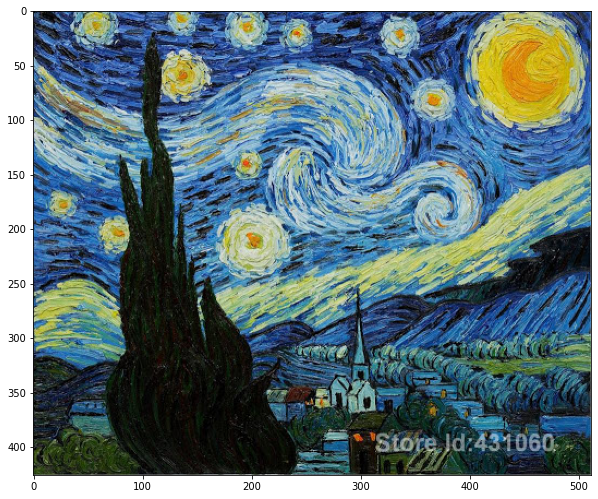

In [9]:
import cv2
cv2_image = cv2.imread("image2.jpg")
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)  # RGB 형태로 변환하여 저장하는 코드


plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

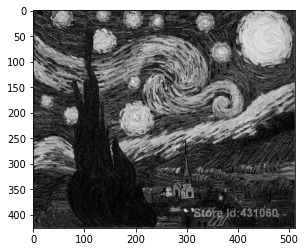

In [10]:
plt.imshow(cv2_image[:,:,0],cmap='gray')    # green 채널을 gray로 뿌려준다. 

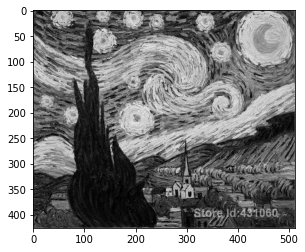

In [11]:
plt.imshow(cv2_image[:,:,1],cmap='gray')    # blue 채널을 gray로 뿌려준다. 

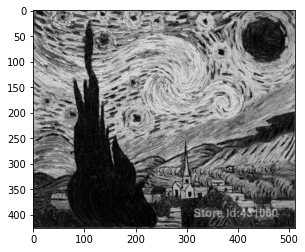

In [12]:
plt.imshow(cv2_image[:,:,2],cmap='gray')    # red 채널을 gray로 뿌려준다. 

In [ ]:
#BGR로 영상을 읽은 후에 RGB로 저장하기 때문에 다시 저장된 영상을 plt.imread로 읽으면 정상적으로 보인다

cv2_image = cv2.imread("test.jpg")
cv2.imwrite("result.jpg", cv2_image) # google colab에서는 imwrite가 안됨.
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread("result.jpg")
plt.imshow(img)
#plt.show()


#### OpenCV 비디오 영상처리
* OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
* VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2

# https://drive.google.com/file/d/1KM-J0nqm3mKudX2epgVHhB3y8ieglkAA/view?usp=sharing
video_input_path = "/content/drive/My Drive/Colab Notebooks/programmers/YOLO.mp4"
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = "/content/drive/My Drive/Colab Notebooks/programmers/YOLO.avi"

cap = cv2.VideoCapture(video_input_path)
# Codec은 *'XVID'로 설정. 
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 4647 FPS: 24 Frame 크기: (1280, 720)


In [ ]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0

while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)

    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()   

frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
frame : 59 처리 완료
frame 

## 2일차 실습내용:

실습 5에서 배우는 OpenCV기반의 face detection코드를 위의 비디오처리 코드와 합쳐서 비디오내의 얼굴영역을 추출하는 코드 작성해보기